## Multi random variables

### Crosstab

It is used to **inspect relationship** between two or more *categorical or discrete variables*

In [133]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt

In [134]:
df = pd.read_csv('sysarmy_tech_salary_survey_2022.csv')
df.head()

,work_province,work_dedication,work_contract_type,monthly_gross_salary,monthly_net_salary,numero,salary_in_usd,salary_last_dollar_value,salary_pay_cripto,crypto_salary_percentage,...,profile_studies_level_state,profile_career,profile_university,profile_boot_camp,profile_boot_camp_carrer,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,profile_age,profile_gender
0,Catamarca,Full-Time,Staff (planta permanente),300000.0,245000.0,True,NaN,NaN,NaN,NaN,...,Completo,Licenciatura en redes y comunicación de datos,UP - Universidad de Palermo,NaN,NaN,NaN,NaN,NaN,35,varon cis
1,Chaco,Full-Time,Remoto (empresa de otro país),900000.0,850000.0,True,Cobro todo el salario en dólares,300,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31,varon cis
2,Chaco,Full-Time,Staff (planta permanente),120000.0,115000.0,True,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,varon cis
3,Chaco,Full-Time,Remoto (empresa de otro país),440000.0,0.0,True,Cobro todo el salario en dólares,220,Cobro todo el salario criptomonedas,100%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,varon cis
4,Chaco,Full-Time,Staff (planta permanente),140000.0,125000.0,True,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,varon cis


In [135]:
df.profile_studies_level.unique()

array(['Universitario', nan, 'Terciario', 'Secundario',
       'Posgrado/Especialización', 'Maestría', 'Doctorado',
       'Posdoctorado'], dtype=object)

In [136]:
studies_cat = CategoricalDtype(categories=['Secundario',
                                           'Terciario',
                                           'Universitario',
                                           'Posgrado/Especialización',
                                           'Maestría',
                                           'Doctorado',
                                           'Posdoctorado'], ordered=True)

In [137]:
df.profile_studies_level = df.profile_studies_level.astype(studies_cat)

In [138]:
df.profile_studies_level.unique()

['Universitario', NaN, 'Terciario', 'Secundario', 'Posgrado/Especialización', 'Maestría', 'Doctorado', 'Posdoctorado']
Categories (7, object): ['Secundario' < 'Terciario' < 'Universitario' < 'Posgrado/Especialización' < 'Maestría' < 'Doctorado' < 'Posdoctorado']

In [139]:
pd.crosstab(df.profile_gender, df.profile_studies_level)

profile_studies_level,Secundario,Terciario,Universitario,Posgrado/Especialización,Maestría,Doctorado,Posdoctorado
profile_gender,,,,,,,
diversidades,7,8,29,4,1,0,0
mujer cis,10,90,354,55,13,5,1
varon cis,125,332,1428,91,87,16,3


In [140]:
pd.crosstab(
    df.profile_gender, df.profile_studies_level, 
).style.background_gradient(axis=0)  

profile_studies_level,Secundario,Terciario,Universitario,Posgrado/Especialización,Maestría,Doctorado,Posdoctorado
profile_gender,,,,,,,
diversidades,7,8,29,4,1,0,0
mujer cis,10,90,354,55,13,5,1
varon cis,125,332,1428,91,87,16,3


In [141]:
gender_vs_studies_crosstab = pd.crosstab(
    df.profile_studies_level, df.profile_gender, normalize=True
)

gender_vs_studies_crosstab.style.background_gradient(axis=0)  

profile_gender,diversidades,mujer cis,varon cis
profile_studies_level,,,
Secundario,0.002633,0.003761,0.047010
Terciario,0.003009,0.033847,0.124859
Universitario,0.010906,0.133133,0.537044
Posgrado/Especialización,0.001504,0.020684,0.034223
Maestría,0.000376,0.004889,0.032719
Doctorado,0.000000,0.001880,0.006017
Posdoctorado,0.000000,0.000376,0.001128


### Multivariable hist

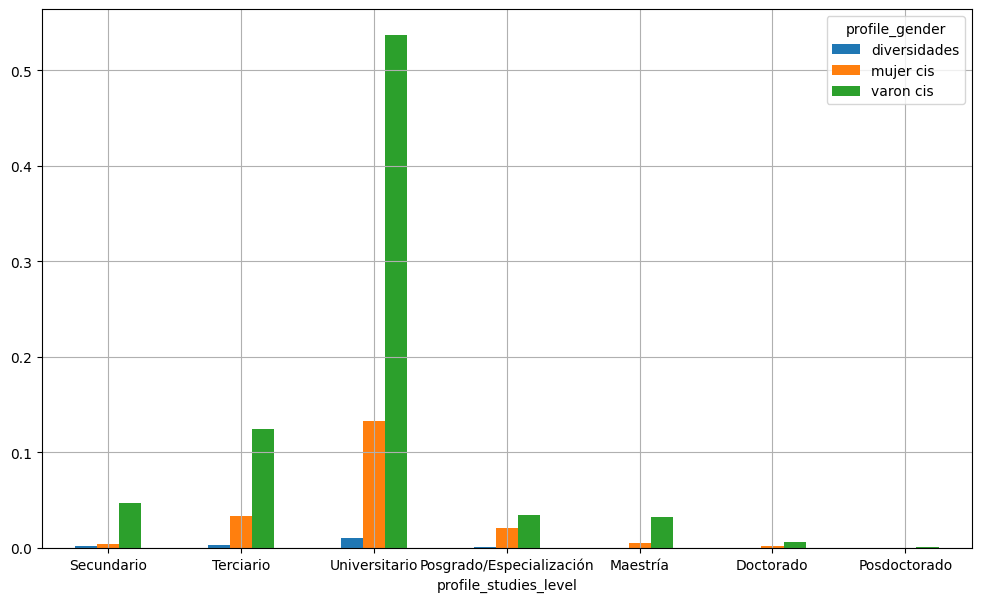

In [142]:
ax = gender_vs_studies_crosstab.plot.bar(rot=0, grid=True, figsize=(12, 7))

### Multivariable scatter

In [113]:
df.columns

Index(['work_province', 'work_dedication', 'work_contract_type',
       'monthly_gross_salary', 'monthly_net_salary', 'numero', 'salary_in_usd',
       'salary_last_dollar_value', 'salary_pay_cripto',
       'crypto_salary_percentage', 'salary_has_bonus', 'salary_bonus_tied_to',
       'salary_inflation_adjustment', 'salary_percentage_inflation_adjustment',
       'salary_month_last_inflation_adjustment',
       'salary_comparison_last_semester', 'salary_benefit',
       'salary_satisfaction', 'role', 'profile_years_experience',
       'work_years_in_company', 'work_years_in_current_position',
       'work_people_in_charge_of', 'tools_platform',
       'tools_programming_languages', 'tools_frameworks', 'tools_data_bases',
       'tools_qa_testing', 'company_employee_number', 'work_work_modality',
       'hybrid_office_hours_per_week', 'company_recommended',
       'profile_studies_level', 'profile_studies_level_state',
       'profile_career', 'profile_university', 'profile_boot_camp',

<Axes: xlabel='profile_age', ylabel='monthly_gross_salary'>

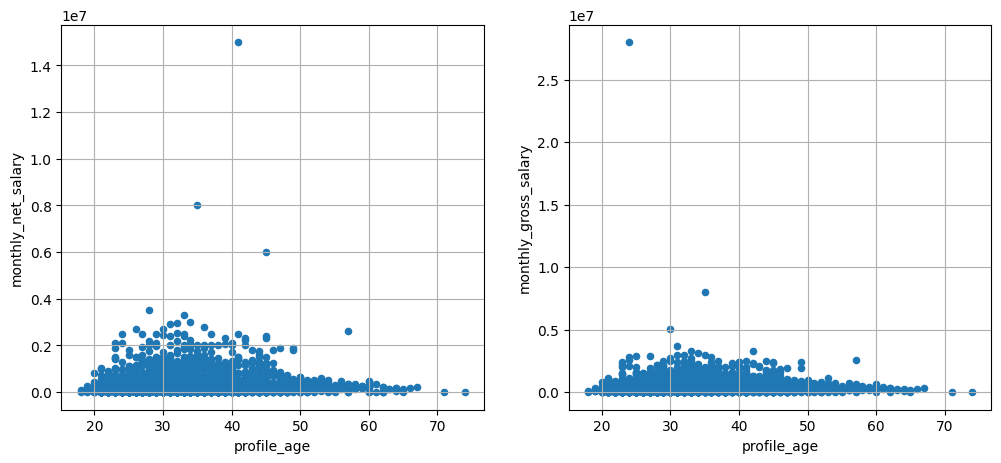

In [178]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(12, 5)

df[['monthly_net_salary', 'profile_age']].plot(ax=axes[0], kind='scatter',
                                               x='profile_age', y='monthly_net_salary',
                                              grid=True)

df[['profile_age', 'monthly_gross_salary']].plot(ax=axes[1], kind='scatter',
                                                        x='profile_age', y='monthly_gross_salary',
                                                sharex=True, grid=True)

<Axes: xlabel='monthly_net_salary', ylabel='monthly_gross_salary'>

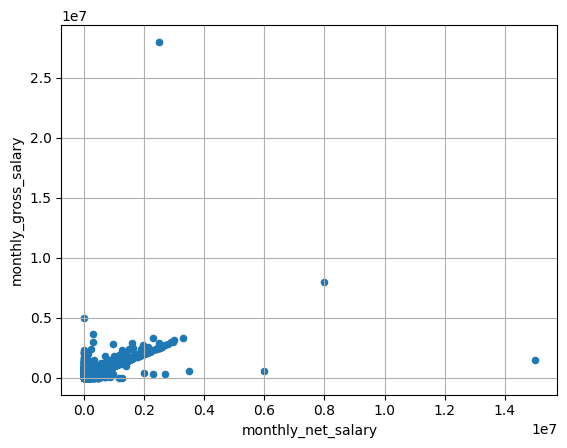

In [180]:
df[['monthly_net_salary', 'monthly_gross_salary']].plot(kind='scatter',
                                               x='monthly_net_salary', y='monthly_gross_salary',
                                              grid=True)